# Query the Fiber Database

In [1]:
import numpy as np
import time

import matplotlib.pyplot as plt

from astropy.table import Table, vstack, hstack
from astropy.coordinates import SkyCoord
import astropy.units as u

from hetdex_api.shot import get_fibers_table
from hetdex_api.survey import FiberIndex

## Query a single coordinate:

In [2]:
coord = SkyCoord(ra=182.21303*u.deg, dec=50.915985*u.deg)

In [3]:
# Intiate the FiberIndex class from hetdex_api.survey:
F = FiberIndex('pdr1')

#help(F.query_region)

FiberIndex.Query_region() returns an astropy table of all fibers within the the aperture defined. Default is 3.5 arcsec radius. amp_flag, gal_flag, meteor, throughput flag populate whether the fiber would make it into the current catalog. 1 is good, 0 is removed. 'flag' combines the three flags

In [4]:
# This example was observed in multiple observations so there are many associated fibers
fibtab = F.query_region(coord, radius=3.5*u.arcsec)

In [5]:
fibtab.show_in_notebook()

idx,multiframe,ra,dec,fiber_id,healpix,amp,date,datevobs,expnum,fibidx,fibnum,fpx,fpy,ifuid,ifuslot,ifux,ifuy,shotid,specid,field,flag,amp_flag,meteor_flag,gal_flag,shot_flag,throughput_flag
0,multi_047_092_075_RU,182.21234,50.916267,20190407021_2_multi_047_092_075_RU_012,1441630867,RU,20190407,20190407v021,2,11,12,245.993,373.342,075,092,-5.08,24.24,20190407021,047,dex-spring,True,True,True,True,True,True
1,multi_047_092_075_RU,182.21191,50.916584,20190407021_1_multi_047_092_075_RU_011,1441630867,RU,20190407,20190407v021,1,10,11,247.318,374.042,075,092,-2.54,24.24,20190407021,047,dex-spring,True,True,True,True,True,True
2,multi_047_092_075_RU,182.21208,50.915886,20190407021_1_multi_047_092_075_RU_031,1441630867,RU,20190407,20190407v021,1,30,31,246.048,371.832,075,092,-3.81,22.03,20190407021,047,dex-spring,True,True,True,True,True,True
3,multi_047_092_075_RU,182.21185,50.915493,20190407021_3_multi_047_092_075_RU_051,1441630867,RU,20190407,20190407v021,3,50,51,245.993,370.332,075,092,-5.08,19.83,20190407021,047,dex-spring,True,True,True,True,True,True
4,multi_047_092_075_RU,182.2117,50.91619,20190407021_3_multi_047_092_075_RU_031,1441630867,RU,20190407,20190407v021,3,30,31,247.263,372.532,075,092,-3.81,22.03,20190407021,047,dex-spring,True,True,True,True,True,True
5,multi_047_092_075_RU,182.21443,50.91575,20190407021_2_multi_047_092_075_RU_014,1441630868,RU,20190407,20190407v021,2,13,14,240.903,373.342,075,092,-10.17,24.24,20190407021,047,dex-spring,True,True,True,True,True,True
6,multi_047_092_075_RU,182.214,50.916065,20190407021_1_multi_047_092_075_RU_013,1441630868,RU,20190407,20190407v021,1,12,13,242.228,374.042,075,092,-7.63,24.24,20190407021,047,dex-spring,True,True,True,True,True,True
7,multi_047_092_075_RU,182.21257,50.91663,20190407021_3_multi_047_092_075_RU_012,1441630868,RU,20190407,20190407v021,3,11,12,245.993,374.742,075,092,-5.08,24.24,20190407021,047,dex-spring,True,True,True,True,True,True
8,multi_047_092_075_RU,182.21362,50.91637,20190407021_3_multi_047_092_075_RU_013,1441630868,RU,20190407,20190407v021,3,12,13,243.443,374.742,075,092,-7.63,24.24,20190407021,047,dex-spring,True,True,True,True,True,True
9,multi_047_092_075_RU,182.21223,50.915188,20190407021_1_multi_047_092_075_RU_051,1441738261,RU,20190407,20190407v021,1,50,51,244.778,369.632,075,092,-5.08,19.83,20190407021,047,dex-spring,True,True,True,True,True,True


In [6]:
# close the FiberIndex class (and associated open h5 files) when done
F.close()

# Use get_fibers_table to access fiber spectra 

Please use the get_fibers_table funtion to extract single fiber spectra. Calibration updates and adjustments are accessed through this function. For example, the raw h5 files are in native 2AA binning and do not have the white dwarf calibration correction applied. You may access those arrays by setting the option rawh5=True. Note that get_fibers_table offers the ability to retrieve fibers within a specified aperture (provide coords + radius option), a specified amp (multiframe option), a specified ifuslot. Please see help(get_fibers_table). The fiber_flux_offset is applicable to stacking analyses.

Note that when combining multiple fibers to perform a spectra extraction you will need to correctly apply the atmospheric diffraction correction. The API has several functions to do this extraction for you. 

1. To extract a PSF-weighted spectrum please see get_spectra.ipynb notebook.
2. To generate line flux maps please see make_narrowband_image.ipynb.
3. To make a data cube and display it please see make_data_cube.ipynb.


In [7]:
from hetdex_api.shot import get_fibers_table

In [8]:
wave = np.linspace(3470, 5540, 1036)

In [9]:
shotlist = list(np.unique( fibtab['shotid']))

In [10]:
print('Fiber coverage is available in the following shotids: {}'.format(shotlist))

Fiber coverage is available in the following shotids: [20190407021]


In [11]:
# example of grabbing all fibers in single shot:
spec_tab = get_fibers_table(shotlist[0], coord)

In [12]:
## More info on get_fibers_table

In [13]:
help( get_fibers_table)

Help on function get_fibers_table in module hetdex_api.shot:

get_fibers_table(shot, coords=None, ifuslot=None, multiframe=None, expnum=None, radius=<Quantity 3.5 arcsec>, survey='hdr4', astropy=True, verbose=False, rawh5=False, F=None, fiber_flux_offset=None, add_rescor=False, add_mask=False, mask_options=None, mask_version=None, ignore_mask=None, mask_in_place=False, mask_value=nan)
    Returns fiber specta for a given shot.
    
    Parameters
    ----------
    shot
        either shotid or datevobs
    coords
        astropy coordinate object
    radius
        an astropy quantity object
    astropy
        flag to make it an astropy table. Deprecated. Output is always an astropy table
    survey
        data release you want to access
    rawh5: bool
        if True, this will simply return the fibers from the specified shoth5
        file. If False (the default), any relevent correcctions
        are applied.
    verbose
        print out warnings. Default is False
    F   Fiber

In [14]:
spec_tab

multiframe,ra,dec,fiber_id,amp,calfib,calfib_counts,calfib_ffsky,calfibe,calfibe_counts,chi2,contid,error1D,expnum,fiber_to_fiber,fibidx,fibnum,fpx,fpy,ifuid,ifuslot,ifux,ifuy,obsind,rms,sky_spectrum,sky_subtracted,specid,spectrum,trace,wavelength
,deg,deg,,,1e-17 erg / (Angstrom s cm2),,1e-17 erg / (Angstrom s cm2),1e-17 erg / (Angstrom s cm2),,,,,,,,,,,,,,,,,,,,,,Angstrom
bytes20,float32,float32,bytes38,bytes2,float32[1036],float32[1036],float32[1036],float32[1036],float32[1036],float32[1032],bytes8,float32[1032],int32,float32[1032],int32,int32,float32,float32,bytes3,bytes3,float32,float32,int32,float32[1032],float32[1032],float32[1032],bytes3,float32[1032],float32[1032],float32[1032]
multi_047_092_075_RU,182.21191,50.916584,20190407021_1_multi_047_092_075_RU_011,RU,0.0 .. 0.0,0.0 .. 0.0,-0.0 .. 0.0,0.0 .. 0.0,0.0 .. 0.0,0.81887656 .. 1.0159861,S/N 0052,13.751459 .. 13.1903715,1,0.84478176 .. 0.90389407,10,11,247.318,374.042,075,092,-2.54,24.24,1,4.917628 .. 5.1587663,121.020706 .. 107.61618,30.544086 .. 28.88933,047,153.01169 .. 137.51656,106.26733 .. 103.973785,3481.7861 .. 5496.499
multi_047_092_075_RU,182.21295,50.916325,20190407021_1_multi_047_092_075_RU_012,RU,0.0 .. 0.0,0.0 .. 0.0,-0.0 .. 0.0,0.0 .. 0.0,0.0 .. 0.0,0.81769365 .. 0.498122,S/N 0052,14.02096 .. 13.520929,1,0.8829924 .. 0.9350255,11,12,244.778,374.042,075,092,-5.08,24.24,1,4.580227 .. 3.7110221,126.494644 .. 118.53482,14.5966 .. 10.112312,047,142.3144 .. 129.49612,115.1998 .. 112.98161,3481.9663 .. 5497.051
multi_047_092_075_RU,182.214,50.916065,20190407021_1_multi_047_092_075_RU_013,RU,0.0 .. 0.0,0.0 .. 0.0,-0.0 .. 0.0,0.0 .. 0.0,0.0 .. 0.0,0.7905547 .. 0.49956927,S/N 0052,13.9085455 .. 13.654607,1,0.86432797 .. 0.9170046,12,13,242.228,374.042,075,092,-7.63,24.24,1,4.583771 .. 3.3264768,123.82084 .. 119.40464,1.4037967 .. 12.229787,047,126.22407 .. 132.32137,124.146416 .. 122.011795,3482.1555 .. 5497.596
multi_047_092_075_RU,182.21208,50.915886,20190407021_1_multi_047_092_075_RU_031,RU,0.0 .. 0.0,0.0 .. 0.0,-0.0 .. 0.0,0.0 .. 0.0,0.0 .. 0.0,1.5663015 .. 0.5004975,S/N 0052,13.815502 .. 13.547228,1,0.95131093 .. 0.9643706,30,31,246.048,371.832,075,092,-3.81,22.03,1,5.3305473 .. 3.4207976,122.74672 .. 121.12527,-15.62719 .. -8.274664,047,106.55284 .. 112.40317,285.2453 .. 283.4364,3485.471 .. 5506.621
multi_047_092_075_RU,182.21312,50.915623,20190407021_1_multi_047_092_075_RU_032,RU,0.0 .. 0.0,0.0 .. 0.0,-0.0 .. 0.0,0.0 .. 0.0,0.0 .. 0.0,0.8067379 .. 0.8620199,S/N 0052,13.71839 .. 13.551976,1,0.9418365 .. 0.9783994,31,32,243.498,371.832,075,092,-6.36,22.03,1,4.0777164 .. 5.0786114,119.15543 .. 120.26886,3.1750033 .. 30.28142,047,121.76375 .. 150.10284,294.14648 .. 292.21472,3485.6223 .. 5507.1123
multi_047_092_075_RU,182.21416,50.915363,20190407021_1_multi_047_092_075_RU_033,RU,0.0 .. 0.0,0.0 .. 0.0,-0.0 .. 0.0,0.0 .. 0.0,0.0 .. 0.0,0.2944099 .. 0.71716964,S/N 0052,13.55041 .. 13.734056,1,0.92882615 .. 0.9726452,32,33,240.958,371.832,075,092,-8.9,22.03,1,2.6529367 .. 3.892724,115.169556 .. 123.14478,13.93148 .. -2.8704581,047,128.53435 .. 119.82689,303.10278 .. 301.30438,3485.7737 .. 5507.603
multi_047_092_075_RU,182.21223,50.915188,20190407021_1_multi_047_092_075_RU_051,RU,0.0 .. 0.0,0.0 .. 0.0,-0.0 .. 0.0,0.0 .. 0.0,0.0 .. 0.0,1.3008631 .. 1.2362224,S/N 0052,13.153173 .. 13.96853,1,0.9987586 .. 0.97060466,50,51,244.778,369.632,075,092,-5.08,19.83,1,5.777974 .. 5.8537173,106.05574 .. 131.27971,-10.307098 .. 6.966204,047,95.18195 .. 137.79848,471.64044 .. 470.1062,3488.444 .. 5514.905
multi_047_092_075_RU,182.21257,50.91663,20190407021_3_multi_047_092_075_RU_012,RU,0.0 .. 0.0,0.0 .. 0.0,-0.0 .. 0.0,0.0 .. 0.0,0.0 .. 0.0,0.20949575 .. 0.53787726,S/N 0052,14.16332 .. 13.867719,3,0.8829924 .. 0.9350255,11,12,245.993,374.742,075,092,-5.08,24.24,1,2.2965612 .. 3.5165098,130.89207 .. 128.0368,-1.5701933 .. -12.017702,047,129.58072 .. 116.31113,115.33434 .. 113.00158,3481.723 .. 5497.0137


In [15]:
%matplotlib inline

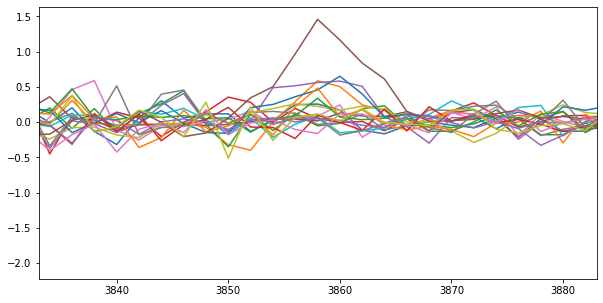

In [16]:
# Here is every fiber in the 3.5 arcsec aperture
plt.figure(figsize=(10,5))
for row in spec_tab:
    plt.plot(wave, row['calfib'], label='FiberID is {}'.format(row['fiber_id']))
    plt.xlim(3858-25, 3858+25)
#plt.legend()